### Basic Statistics for ~short generated y_c, y_r data

**Goal**: basic stats on the generated responses for inclusion in final report

**Authors**: Owen Terry, Varun Ramamurthi, Sungjoon Park  
**Concept**: ~short (Responses less than 50 words)
**Last edited: 12.6.2025**

In [2]:
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter


PART 1: TRAINING DATA ANALYSIS

📊 TRAINING DATA ANALYSIS: ~short Neologism

Loading data from ../data-prep/short/short_complete.jsonl...
✅ Loaded 1030 training examples

📏 WORD COUNT STATISTICS

CHOSEN RESPONSES (Short):
----------------------------------------
  Sample Size:        1030
  Mean:               40.94 words
  Median:             42.00 words
  Std Dev:            10.08 words
  Min:                1 words
  Max:                84 words
  25th Percentile:    37.00 words
  75th Percentile:    46.00 words
  95% CI:             [40.32, 41.55]

REJECTED RESPONSES (Long):
----------------------------------------
  Sample Size:        1030
  Mean:               493.99 words
  Median:             497.00 words
  Std Dev:            60.28 words
  Min:                8 words
  Max:                904 words
  25th Percentile:    468.00 words
  75th Percentile:    524.00 words
  95% CI:             [490.31, 497.68]

🔄 COMPARISON

  Mean Difference:    453.06 words
  Ratio (Rejected/Cho

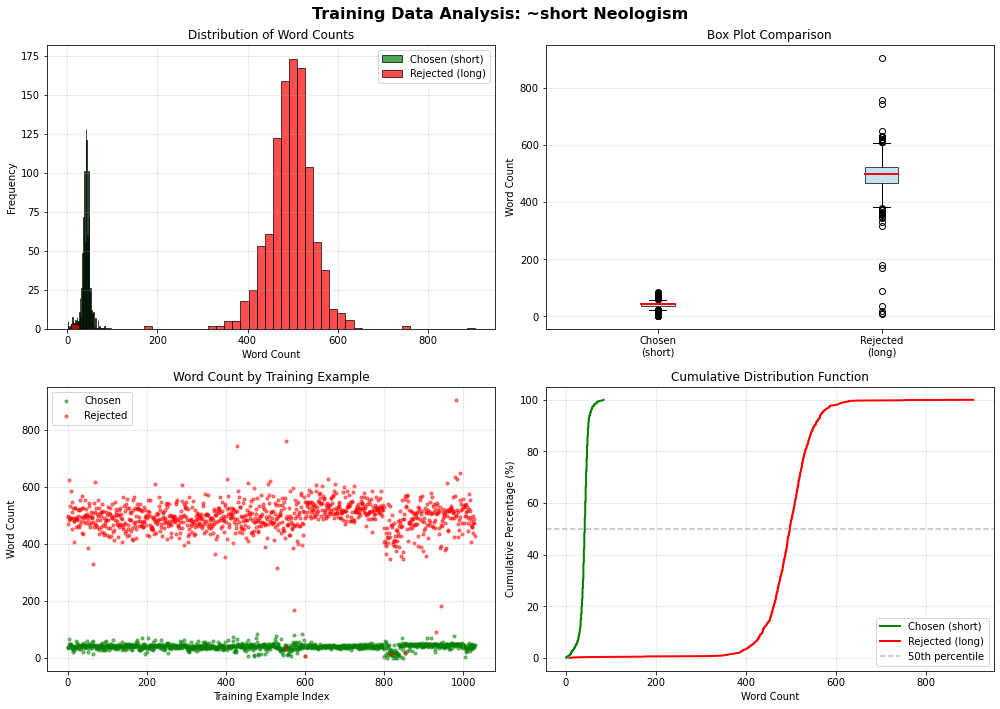

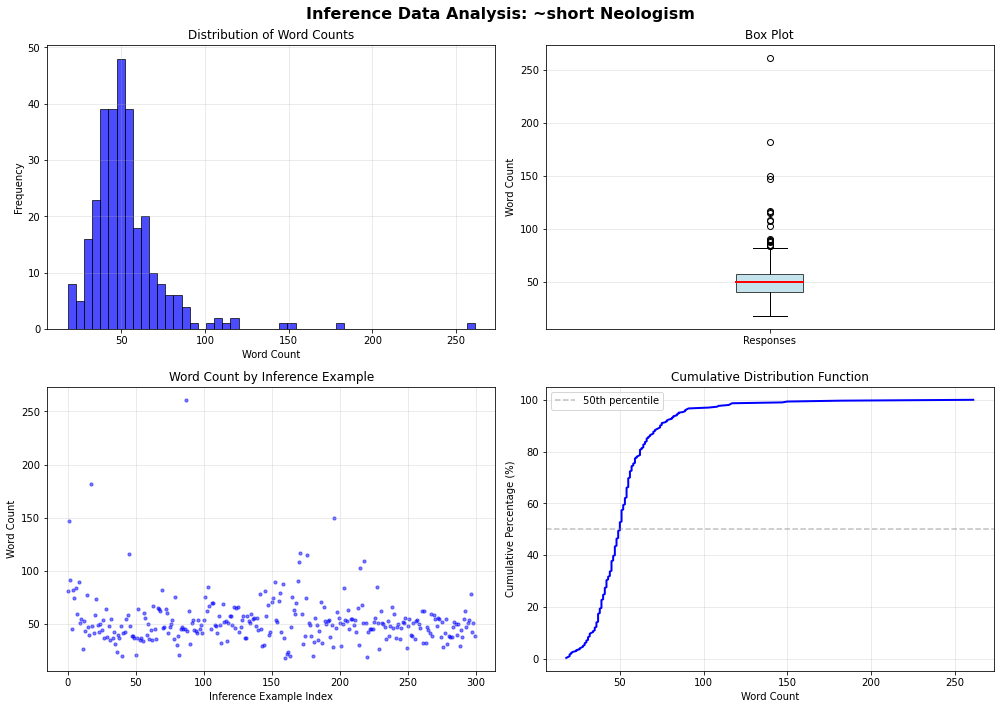

In [3]:

def load_jsonl(filename):
    """Load JSONL file into list of dictionaries."""
    data = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return data

def count_words(text):
    """Count words in text."""
    return len(text.split())

def compute_statistics(data):
    """Compute mean, median, std dev, and confidence intervals."""
    arr = np.array(data)
    
    stats_dict = {
        'mean': np.mean(arr),
        'median': np.median(arr),
        'std': np.std(arr, ddof=1),  # Sample standard deviation
        'min': np.min(arr),
        'max': np.max(arr),
        'q25': np.percentile(arr, 25),
        'q75': np.percentile(arr, 75),
    }
    
    # 95% Confidence Interval for the mean
    confidence_level = 0.95
    degrees_freedom = len(arr) - 1
    sample_mean = stats_dict['mean']
    sample_std_error = stats.sem(arr)
    
    confidence_interval = stats.t.interval(
        confidence_level,
        degrees_freedom,
        sample_mean,
        sample_std_error
    )
    
    stats_dict['ci_lower'] = confidence_interval[0]
    stats_dict['ci_upper'] = confidence_interval[1]
    stats_dict['n'] = len(arr)
    
    return stats_dict

def analyze_training_data(filename):
    """Main analysis function."""
    
    print("="*70)
    print("📊 TRAINING DATA ANALYSIS: ~short Neologism")
    print("="*70)
    print()
    
    # Load data
    print(f"Loading data from {filename}...")
    data = load_jsonl(filename)
    print(f"✅ Loaded {len(data)} training examples\n")
    
    # Extract word counts
    chosen_word_counts = [count_words(item['chosen']) for item in data]
    rejected_word_counts = [count_words(item['rejected']) for item in data]
    
    # Compute statistics
    print("="*70)
    print("📏 WORD COUNT STATISTICS")
    print("="*70)
    print()
    
    chosen_stats = compute_statistics(chosen_word_counts)
    rejected_stats = compute_statistics(rejected_word_counts)
    
    # Print chosen (short) statistics
    print("CHOSEN RESPONSES (Short):")
    print("-" * 40)
    print(f"  Sample Size:        {chosen_stats['n']}")
    print(f"  Mean:               {chosen_stats['mean']:.2f} words")
    print(f"  Median:             {chosen_stats['median']:.2f} words")
    print(f"  Std Dev:            {chosen_stats['std']:.2f} words")
    print(f"  Min:                {chosen_stats['min']:.0f} words")
    print(f"  Max:                {chosen_stats['max']:.0f} words")
    print(f"  25th Percentile:    {chosen_stats['q25']:.2f} words")
    print(f"  75th Percentile:    {chosen_stats['q75']:.2f} words")
    print(f"  95% CI:             [{chosen_stats['ci_lower']:.2f}, {chosen_stats['ci_upper']:.2f}]")
    print()
    
    # Print rejected (long) statistics
    print("REJECTED RESPONSES (Long):")
    print("-" * 40)
    print(f"  Sample Size:        {rejected_stats['n']}")
    print(f"  Mean:               {rejected_stats['mean']:.2f} words")
    print(f"  Median:             {rejected_stats['median']:.2f} words")
    print(f"  Std Dev:            {rejected_stats['std']:.2f} words")
    print(f"  Min:                {rejected_stats['min']:.0f} words")
    print(f"  Max:                {rejected_stats['max']:.0f} words")
    print(f"  25th Percentile:    {rejected_stats['q25']:.2f} words")
    print(f"  75th Percentile:    {rejected_stats['q75']:.2f} words")
    print(f"  95% CI:             [{rejected_stats['ci_lower']:.2f}, {rejected_stats['ci_upper']:.2f}]")
    print()
    
    # Comparison
    print("="*70)
    print("🔄 COMPARISON")
    print("="*70)
    print()
    print(f"  Mean Difference:    {rejected_stats['mean'] - chosen_stats['mean']:.2f} words")
    print(f"  Ratio (Rejected/Chosen): {rejected_stats['mean'] / chosen_stats['mean']:.2f}x")
    print()
    
    # Statistical test (paired t-test since same prompts)
    t_statistic, p_value = stats.ttest_rel(rejected_word_counts, chosen_word_counts)
    print(f"  Paired t-test:")
    print(f"    t-statistic:      {t_statistic:.4f}")
    print(f"    p-value:          {p_value:.4e}")
    print(f"    Significant?      {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
    print()
    
    # Under 50 words analysis
    print("="*70)
    print("🎯 CHOSEN RESPONSES UNDER 50 WORDS")
    print("="*70)
    print()
    
    under_50 = sum(1 for count in chosen_word_counts if count < 50)
    total = len(chosen_word_counts)
    percentage = (under_50 / total) * 100
    
    print(f"  Count:              {under_50} / {total}")
    print(f"  Percentage:         {percentage:.2f}%")
    print()
    
    # Additional thresholds
    thresholds = [25, 50, 75, 100, 150]
    print("  Distribution by thresholds:")
    print("  " + "-" * 40)
    for threshold in thresholds:
        under_threshold = sum(1 for count in chosen_word_counts if count < threshold)
        pct = (under_threshold / total) * 100
        print(f"    < {threshold:3d} words:      {under_threshold:4d} ({pct:5.2f}%)")
    print()
    
    # Word count distribution
    print("="*70)
    print("📊 WORD COUNT DISTRIBUTION (Chosen)")
    print("="*70)
    print()
    
    bins = [0, 25, 50, 75, 100, 150, 200, 300, float('inf')]
    bin_labels = ['0-25', '26-50', '51-75', '76-100', '101-150', '151-200', '201-300', '300+']
    
    distribution = {label: 0 for label in bin_labels}
    for count in chosen_word_counts:
        for i, (lower, upper) in enumerate(zip(bins[:-1], bins[1:])):
            if lower <= count < upper:
                distribution[bin_labels[i]] += 1
                break
    
    for label, count in distribution.items():
        pct = (count / total) * 100
        bar = '█' * int(pct / 2)
        print(f"  {label:>10} words: {count:4d} ({pct:5.2f}%) {bar}")
    print()
    
    # Create visualizations
    create_visualizations(chosen_word_counts, rejected_word_counts)
    
    return {
        'chosen_stats': chosen_stats,
        'rejected_stats': rejected_stats,
        'under_50_count': under_50,
        'under_50_percentage': percentage,
        'distribution': distribution
    }

def create_visualizations(chosen_counts, rejected_counts):
    """Create and save visualization plots."""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Training Data Analysis: ~short Neologism', fontsize=16, fontweight='bold')
    
    # 1. Histograms
    ax1 = axes[0, 0]
    ax1.hist(chosen_counts, bins=50, alpha=0.7, label='Chosen (short)', color='green', edgecolor='black')
    ax1.hist(rejected_counts, bins=50, alpha=0.7, label='Rejected (long)', color='red', edgecolor='black')
    ax1.set_xlabel('Word Count')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Word Counts')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plots
    ax2 = axes[0, 1]
    ax2.boxplot([chosen_counts, rejected_counts], 
                labels=['Chosen\n(short)', 'Rejected\n(long)'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    ax2.set_ylabel('Word Count')
    ax2.set_title('Box Plot Comparison')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Scatter plot (index vs word count)
    ax3 = axes[1, 0]
    indices = range(len(chosen_counts))
    ax3.scatter(indices, chosen_counts, alpha=0.5, s=10, label='Chosen', color='green')
    ax3.scatter(indices, rejected_counts, alpha=0.5, s=10, label='Rejected', color='red')
    ax3.set_xlabel('Training Example Index')
    ax3.set_ylabel('Word Count')
    ax3.set_title('Word Count by Training Example')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Cumulative distribution
    ax4 = axes[1, 1]
    chosen_sorted = np.sort(chosen_counts)
    rejected_sorted = np.sort(rejected_counts)
    chosen_cumulative = np.arange(1, len(chosen_sorted) + 1) / len(chosen_sorted) * 100
    rejected_cumulative = np.arange(1, len(rejected_sorted) + 1) / len(rejected_sorted) * 100
    
    ax4.plot(chosen_sorted, chosen_cumulative, label='Chosen (short)', color='green', linewidth=2)
    ax4.plot(rejected_sorted, rejected_cumulative, label='Rejected (long)', color='red', linewidth=2)
    ax4.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50th percentile')
    ax4.set_xlabel('Word Count')
    ax4.set_ylabel('Cumulative Percentage (%)')
    ax4.set_title('Cumulative Distribution Function')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save figure
    output_file = 'short_training_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"📈 Visualization saved to: {output_file}")
    print()
    
    return output_file

def analyze_inference_data(filename):
    """Main analysis function for inference results."""
    
    print("="*70)
    print("📊 INFERENCE DATA ANALYSIS: ~short Neologism")
    print("="*70)
    print()
    
    # Load data
    print(f"Loading data from {filename}...")
    data = load_jsonl(filename)
    print(f"✅ Loaded {len(data)} inference examples\n")
    
    # Extract word counts (inference results only have 'response' field)
    response_word_counts = [count_words(item['response']) for item in data]
    
    # Compute statistics
    print("="*70)
    print("📏 WORD COUNT STATISTICS")
    print("="*70)
    print()
    
    response_stats = compute_statistics(response_word_counts)
    
    # Print response statistics
    print("RESPONSES:")
    print("-" * 40)
    print(f"  Sample Size:        {response_stats['n']}")
    print(f"  Mean:               {response_stats['mean']:.2f} words")
    print(f"  Median:             {response_stats['median']:.2f} words")
    print(f"  Std Dev:            {response_stats['std']:.2f} words")
    print(f"  Min:                {response_stats['min']:.0f} words")
    print(f"  Max:                {response_stats['max']:.0f} words")
    print(f"  25th Percentile:    {response_stats['q25']:.2f} words")
    print(f"  75th Percentile:    {response_stats['q75']:.2f} words")
    print(f"  95% CI:             [{response_stats['ci_lower']:.2f}, {response_stats['ci_upper']:.2f}]")
    print()
    
    # Under 50 words analysis
    print("="*70)
    print("🎯 RESPONSES UNDER 50 WORDS")
    print("="*70)
    print()
    
    under_50 = sum(1 for count in response_word_counts if count < 50)
    total = len(response_word_counts)
    percentage = (under_50 / total) * 100
    
    print(f"  Count:              {under_50} / {total}")
    print(f"  Percentage:         {percentage:.2f}%")
    print()
    
    # Additional thresholds
    thresholds = [25, 50, 75, 100, 150]
    print("  Distribution by thresholds:")
    print("  " + "-" * 40)
    for threshold in thresholds:
        under_threshold = sum(1 for count in response_word_counts if count < threshold)
        pct = (under_threshold / total) * 100
        print(f"    < {threshold:3d} words:      {under_threshold:4d} ({pct:5.2f}%)")
    print()
    
    # Word count distribution
    print("="*70)
    print("📊 WORD COUNT DISTRIBUTION")
    print("="*70)
    print()
    
    bins = [0, 25, 50, 75, 100, 150, 200, 300, float('inf')]
    bin_labels = ['0-25', '26-50', '51-75', '76-100', '101-150', '151-200', '201-300', '300+']
    
    distribution = {label: 0 for label in bin_labels}
    for count in response_word_counts:
        for i, (lower, upper) in enumerate(zip(bins[:-1], bins[1:])):
            if lower <= count < upper:
                distribution[bin_labels[i]] += 1
                break
    
    for label, count in distribution.items():
        pct = (count / total) * 100
        bar = '█' * int(pct / 2)
        print(f"  {label:>10} words: {count:4d} ({pct:5.2f}%) {bar}")
    print()
    
    # Create visualizations for inference data
    create_inference_visualizations(response_word_counts)
    
    return {
        'response_stats': response_stats,
        'under_50_count': under_50,
        'under_50_percentage': percentage,
        'distribution': distribution
    }

def create_inference_visualizations(response_counts):
    """Create and save visualization plots for inference data."""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Inference Data Analysis: ~short Neologism', fontsize=16, fontweight='bold')
    
    # 1. Histogram
    ax1 = axes[0, 0]
    ax1.hist(response_counts, bins=50, alpha=0.7, color='blue', edgecolor='black')
    ax1.set_xlabel('Word Count')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Word Counts')
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot
    ax2 = axes[0, 1]
    ax2.boxplot([response_counts], 
                labels=['Responses'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    ax2.set_ylabel('Word Count')
    ax2.set_title('Box Plot')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Scatter plot (index vs word count)
    ax3 = axes[1, 0]
    indices = range(len(response_counts))
    ax3.scatter(indices, response_counts, alpha=0.5, s=10, color='blue')
    ax3.set_xlabel('Inference Example Index')
    ax3.set_ylabel('Word Count')
    ax3.set_title('Word Count by Inference Example')
    ax3.grid(True, alpha=0.3)
    
    # 4. Cumulative distribution
    ax4 = axes[1, 1]
    response_sorted = np.sort(response_counts)
    response_cumulative = np.arange(1, len(response_sorted) + 1) / len(response_sorted) * 100
    
    ax4.plot(response_sorted, response_cumulative, color='blue', linewidth=2)
    ax4.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50th percentile')
    ax4.set_xlabel('Word Count')
    ax4.set_ylabel('Cumulative Percentage (%)')
    ax4.set_title('Cumulative Distribution Function')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save figure
    output_file = 'short_inference_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"📈 Visualization saved to: {output_file}")
    print()
    
    return output_file

if __name__ == "__main__":
    # Run training data analysis
    print("\n" + "="*70)
    print("PART 1: TRAINING DATA ANALYSIS")
    print("="*70 + "\n")
    training_results = analyze_training_data('../data-prep/short/short_complete.jsonl')
    
    print("\n" + "="*70)
    print("PART 2: INFERENCE DATA ANALYSIS")
    print("="*70 + "\n")
    inference_results = analyze_inference_data('../inference/mistral_with_short_inference_results.jsonl')
    
    print("="*70)
    print("✅ All Analyses Complete!")
    print("="*70)